# Build an Autoencoders deep neural network model for solving any specific problems. The task and dataset you  may decide for which build a model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the pixel values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape the images to (28, 28, 1) for compatibility with Conv2D layers
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

In [4]:
# Define the autoencoder model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

Epoch 1/10
469/469 [==============================] - 147s 307ms/step - loss: 0.1531 - val_loss: 0.1123
Epoch 2/10
469/469 [==============================] - 152s 323ms/step - loss: 0.1095 - val_loss: 0.1049
Epoch 3/10
469/469 [==============================] - 155s 330ms/step - loss: 0.1044 - val_loss: 0.1028
Epoch 4/10
469/469 [==============================] - 155s 330ms/step - loss: 0.1017 - val_loss: 0.0999
Epoch 5/10
469/469 [==============================] - 157s 334ms/step - loss: 0.0999 - val_loss: 0.0984
Epoch 6/10
469/469 [==============================] - 155s 330ms/step - loss: 0.0987 - val_loss: 0.0974
Epoch 7/10
469/469 [==============================] - 155s 330ms/step - loss: 0.0978 - val_loss: 0.0968
Epoch 8/10
469/469 [==============================] - 155s 331ms/step - loss: 0.0971 - val_loss: 0.0966
Epoch 9/10
469/469 [==============================] - 155s 330ms/step - loss: 0.0966 - val_loss: 0.0956
Epoch 10/10
313/313 [==============================] - 8s 22ms/s

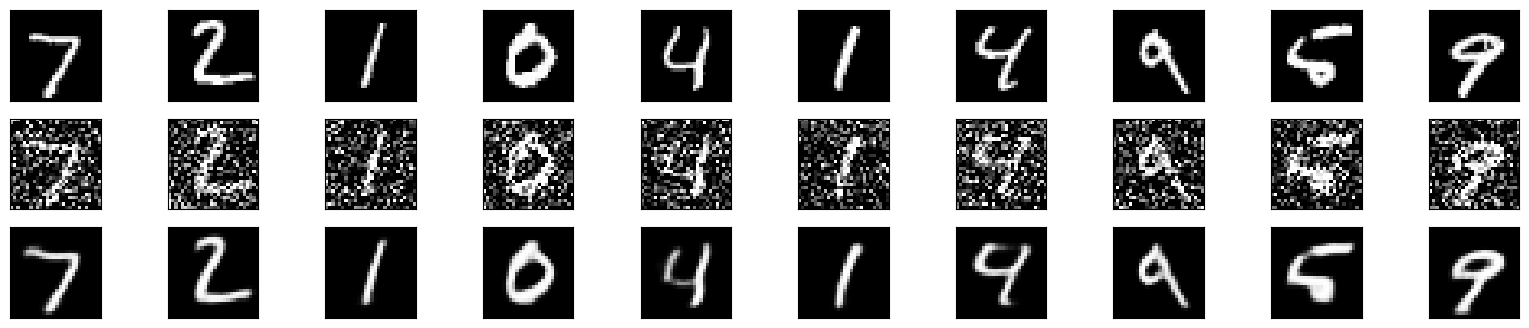

In [5]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Denoise some test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()